# 
Mahendra Nandi \
[BDA,RKMVERI-2020](http://cs.rkmvu.ac.in/)

# Question_2

Consider a $2000\times2000$ image I, where all pixels in the left half (first 1000 columns) are white and those in the right half (last 1000 columns) are black. A new image ($I_{new}$) of the same size is formed from I by shuffling the pixel locations. Let $D$ denotes the Euclidean distance between I and $I_{new}$. What is the total number of possible $I_{new}$ images? What is the average of $D$ across all these possible $I_{new}$ images? Explain your answer. *
----------------


In [43]:
!pip install ipython-autotime

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.18 s (started: 2021-07-21 00:39:13 +05:30)


In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

time: 1.51 ms (started: 2021-07-21 00:39:17 +05:30)


## Index value generated For a 4X4 Matrix

In [45]:
mat1=np.ones((4,2),dtype=np.int)
mat1

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

time: 3.04 ms (started: 2021-07-21 00:39:18 +05:30)


In [46]:
mat2=np.zeros((4,2),dtype=np.int)
mat2

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

time: 2.87 ms (started: 2021-07-21 00:39:18 +05:30)


In [47]:
mat = np.concatenate((mat1,mat2),axis=1)

time: 543 µs (started: 2021-07-21 00:39:18 +05:30)


In [48]:
mat

array([[1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0]])

time: 2.04 ms (started: 2021-07-21 00:39:18 +05:30)


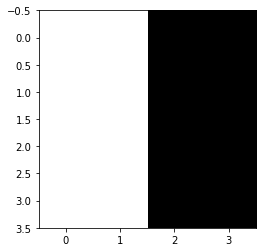

time: 72.4 ms (started: 2021-07-21 00:39:18 +05:30)


In [49]:
plt.imshow(mat,cmap="gray")

In [50]:
mat.shape

(4, 4)

time: 1.87 ms (started: 2021-07-21 00:39:19 +05:30)


In [51]:
A=[]
for i in range(4):
    for j in range(4):
        A.append([i,j])
A        

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3]]

time: 3.35 ms (started: 2021-07-21 00:39:19 +05:30)


In [52]:
# B=[]
# for i in range (len(A)):
#     for j in range(i+1,len(A)):
#         B.append([A[i][0],A[i][1],A[j][0],A[j][1]])

# #len(B)
# B

time: 190 µs (started: 2021-07-21 00:39:19 +05:30)


### Distance Vector Generated

## Functional Representation

In [53]:
def Distance_Generation(image_height,image_width):
    """
    image_height: Height of the image
    image_width: Width of the image
    """
    Dist=[]
    r=image_height*image_width
    m=np.int(r/2+1)
    for i in range(m):
        Dist.append(np.sqrt(i*2))
    return Dist

time: 500 µs (started: 2021-07-21 00:39:20 +05:30)


### Number Of Candidate Points 

In [54]:
def Candidate_Points(image_height,image_width):
    """
    image_height: Height of the image
    image_width: Width of the image
    """
    r=image_height*image_width
    Candidates=[]
    m=np.int(r/2+1)
    for i in range(m):
        Candidates.append((math.comb(np.int(r/2),i))**2)
    return Candidates

time: 526 µs (started: 2021-07-21 00:39:20 +05:30)


## Average Euclidean Distance

In [55]:
def avg_euclidean_dist(image_height,image_width):
    """
    image_height: Height of the image
    image_width: Width of the image
    """
    dist=Distance_Generation(image_height,image_width)
    cand=Candidate_Points(image_height,image_width)
    k=list(np.array(dist)*np.array(cand))
    total=(math.factorial(image_height*image_width)/np.square(math.factorial((image_height*image_width)/2)))
    return sum(k)/total

time: 530 µs (started: 2021-07-21 00:39:20 +05:30)


In [56]:
avg_euclidean_dist(4,4)

2.803079012737049

time: 1.91 ms (started: 2021-07-21 00:39:20 +05:30)


In [57]:
Distance_Generation(4,4)

[0.0,
 1.4142135623730951,
 2.0,
 2.449489742783178,
 2.8284271247461903,
 3.1622776601683795,
 3.4641016151377544,
 3.7416573867739413,
 4.0]

time: 2.15 ms (started: 2021-07-21 00:39:21 +05:30)


# in one function 

$ $


Initially I have put the following example for easy understand, taking an image of 2x2 and showing the algorithm. and at the last porting I explained the ${(^{n^2 /2}C_i)}^2$ term as well with taking another example of 4x4 image.
<img src="solution.jpeg">

So, in general for an image nxn where n is even, the problem reduced to:


$$\Bigg[ \frac{sum([ \ 0,\sqrt{2},\sqrt{4},\sqrt{6},..,\sqrt{n^2} \ ]*[(^{n^2/2}C_0)^2,(^{n^2/2}C_1)^2,(^{n^2/2}C_2)^2,(^{n^2/2}C_3)^2,..,(^{n^2/2}C_{^{n^2/2}} ] )}  {\frac{(n^2!)} {(n^2/2!)(n^2/2!)}}  \Bigg]$$ (* denotes point wise multiplication of those two lists)


 $$= \displaystyle \Bigg[\frac{\sum \limits _{i=0} ^{n^2/2} (^{n^2/2}C_i)^2 \sqrt{2i}}   {\sum \limits _{i=0} ^{n^2/2} (^{n^2/2}C_i)^2}\Bigg]$$

In [58]:
import numpy as np
import math

# we are using here images with same height and width. So, here image_dimension = n if image is of nxn dims.
# Distances is a list of Euclidean distances of every 'I_new' vectors from 'I' vector.
# Candidates is another list containing the no of vectors having same distance (accordance with the list 'Distances')
#      so, the length of these two lists are same.
def get_average_distance(image_dimension):
    
    Distances=[]
    Candidates=[]
    no_of_pixels=image_dimension*image_dimension
    m=np.int((no_of_pixels/2) + 1)
    for i in range(m):
        Distances.append(np.sqrt(i*2))
#     print("Distances = {}".format(Distances))
    for i in range(m):
        Candidates.append((math.comb(np.int(no_of_pixels/2),i))**2)
#     print("\nCandidates = {}".format(Candidates))
    total_distances=list(np.array(Distances)*np.array(Candidates))
#     print("\ntotal_distances = {}".format(total_distances))
    no_of_total_vector=int(math.factorial(no_of_pixels)/np.square(math.factorial((no_of_pixels)/2)))
#     print("\n\nno_of_total_vector = {}".format(sum(Candidates)))
    if no_of_total_vector == sum(Candidates):
        print("\n\nYou have done correct calculation.\nThe total no of possible image vector after shuffle is : {}".format(int(sum(Candidates))))
    return print("\n\nThe average Euclidean distance of 'I_new' from 'I' is : {:.3f}".format(sum(total_distances)/sum(Candidates)))

time: 821 µs (started: 2021-07-21 00:39:21 +05:30)


In [59]:
get_average_distance(2)



You have done correct calculation.
The total no of possible image vector after shuffle is : 6


The average Euclidean distance of 'I_new' from 'I' is : 1.276
time: 595 µs (started: 2021-07-21 00:39:22 +05:30)


In [60]:
get_average_distance(4)



You have done correct calculation.
The total no of possible image vector after shuffle is : 12870


The average Euclidean distance of 'I_new' from 'I' is : 2.803
time: 551 µs (started: 2021-07-21 00:39:22 +05:30)


In [61]:
get_average_distance(6)



The average Euclidean distance of 'I_new' from 'I' is : 4.227
time: 575 µs (started: 2021-07-21 00:39:22 +05:30)


In [62]:
get_average_distance(8)



The average Euclidean distance of 'I_new' from 'I' is : 5.645
time: 903 µs (started: 2021-07-21 00:39:22 +05:30)


In [63]:
get_average_distance(32)



The average Euclidean distance of 'I_new' from 'I' is : 22.625
time: 14.3 ms (started: 2021-07-21 00:39:23 +05:30)


In [64]:
# another short function 

time: 147 µs (started: 2021-07-21 00:39:23 +05:30)


In [65]:
import numpy as np
import math

# we are using here images with same height and width. So, here image_dimension = n if image is of nxn dims.
# Total_vectors is a list of no of vectors having same Euclidean distances from 'I' vector.
# Total_distances is another list containing the total distance for group of vectors having same distance (accordance with the list 'Distances')
#      so, the length of these two lists are same.
def get_average_distance(image_dimension):
    no_of_pixels=int(image_dimension*image_dimension)
    m=np.int((no_of_pixels/2) + 1)
    Total_distances=[]
    Total_vectors=[]
    for i in range(m):
        Total_distances.append(round(((math.comb(np.int(no_of_pixels/2),i))**2) * (np.sqrt(2*i)) ,3))
        Total_vectors.append(((math.comb(np.int(no_of_pixels/2),i))**2))
    return round(sum(Total_distances)/sum(Total_vectors),3)

# here we can calculate for an image of maximum dimension 32x32 , above that we have to go for approximation for values otherwise

time: 836 µs (started: 2021-07-21 00:39:23 +05:30)


In [66]:
get_average_distance(32)

22.625

time: 30.8 ms (started: 2021-07-21 00:39:23 +05:30)


In [67]:
get_average_distance(34)

<ipython-input-65-c30385329cee>:14: RuntimeWarning: overflow encountered in multiply
  Total_distances.append(round(((math.comb(np.int(no_of_pixels/2),i))**2) * (np.sqrt(2*i)) ,3))


OverflowError: int too large to convert to float

time: 18.8 ms (started: 2021-07-21 00:39:24 +05:30)


# Another problem not related to the above question

A number spiral is an infinite grid whose upper-left square has number 1. Here are the first five layers of the spiral:
<img src="image.png">
Your task is to find out the number in row y and column x.
---------


In [68]:
x=5
y=2
    
if x%2==0:
    if y<x:
        value=(x**2)-(y-1)
    else:
        if y%2==0:
            value= ((y-1)**2)+x
        else:
            value= (y**2)-(x-1)
else:
    if y<x:
        value=((x-1)**2)+y
    else:
        if y%2==0:
            value= ((y-1)**2)+x
        else:
            value= (y**2)-(x-1)
value

18

time: 2.92 ms (started: 2021-07-21 00:39:25 +05:30)


In [39]:
# ANother approach
x=5
y=2
# for i in range(x):
#     for j in range(y):
       
def get_value(x,y):    
    if x<y:
        if y%2==0:
            value= ((y-1)**2)+x
        else:
            value= (y**2)-(x-1)
    else:
        if x%2==0:
            value=(x**2)-(y-1)
        else:
            value=((x-1)**2)+y
    return value

In [42]:

get_value(3,5)

23

time: 1.9 ms (started: 2021-07-21 00:37:41 +05:30)
